<span style="color:red">**Team members / emails**</span> --> *Employees Attrition analysis*
- (1) MELLAL Houdaifa / hodaifa.mellal@gmail.com 

#Configuration avec le compte google pour recupèrer les fichiers a partir du drive:

In [ ]:
!pip install PyDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1-as9SsLTUqg7I1VcrXqqPkDzA7mIS2Sj"})   # The id of the file favorites file
downloaded.GetContentFile('wholedata.csv')        # The name of the file

downloaded = drive.CreateFile({'id':"1aUjLL6ubMZHYD6mE3UqqwIHIZ_BrLvRW"})   # The id of the file bookmarks file
downloaded.GetContentFile('data_dictionary.xlsx')        # The name of the file


# Employee attrition analysis:

Les imports necessaires pour les phases de prétraitement des données, création, entrainement et evaluations des differents modèles:

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
  
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#1. Préparation des données:

Lire la description de chaque colonne de notre data set:

In [ ]:
cols = pd.read_excel('/content/drive/MyDrive/archive (1)/data_dictionary.xlsx')

Le tableau suivant montre une descirption de chaque variable de notre data set avec les valeurs possible:

In [ ]:
cols

Variable  ...             Levels
0                        Age  ...                NaN
1                  Attrition  ...                NaN
2             BusinessTravel  ...                NaN
3                 Department  ...                NaN
4           DistanceFromHome  ...                NaN
5                  Education  ...  1 'Below College'
6                        NaN  ...        2 'College'
7                        NaN  ...       3 'Bachelor'
8                        NaN  ...         4 'Master'
9                        NaN  ...         5 'Doctor'
10            EducationField  ...                NaN
11             EmployeeCount  ...                NaN
12            EmployeeNumber  ...                NaN
13   EnvironmentSatisfaction  ...            1 'Low'
14                       NaN  ...         2 'Medium'
15                       NaN  ...           3 'High'
16                       NaN  ...      4 'Very High'
17                    Gender  ...                NaN
18            JobInvolvement  ...            1 'Low'
19                       NaN  ...         2 'Medium'
20                       NaN  ...           3 'High'
21                       NaN  ...      4 'Very High'
22                  JobLevel  ...                NaN
23                   JobRole  ...                NaN
24           JobSatisfaction  ...            1 'Low'
25                       NaN  ...         2 'Medium'
26                       NaN  ...           3 'High'
27                       NaN  ...      4 'Very High'
28             MaritalStatus  ...                NaN
29             MonthlyIncome  ...                NaN
30        NumCompaniesWorked  ...                NaN
31                    Over18  ...                NaN
32         PercentSalaryHike  ...                NaN
33         PerformanceRating  ...            1 'Low'
34                       NaN  ...           2 'Good'
35                       NaN  ...      3 'Excellent'
36                       NaN  ...    4 'Outstanding'
37  RelationshipSatisfaction  ...            1 'Low'
38                       NaN  ...         2 'Medium'
39                       NaN  ...           3 'High'
40                       NaN  ...      4 'Very High'
41             StandardHours  ...                NaN
42          StockOptionLevel  ...                NaN
43         TotalWorkingYears  ...                NaN
44     TrainingTimesLastYear  ...                NaN
45           WorkLifeBalance  ...            1 'Bad'
46                       NaN  ...           2 'Good'
47                       NaN  ...         3 'Better'
48                       NaN  ...           4 'Best'
49            YearsAtCompany  ...                NaN
50   YearsSinceLastPromotion  ...                NaN
51      YearsWithCurrManager  ...                NaN

[52 rows x 3 columns]

La lecture du data set avec un affichage des 10 premiers lignes:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive (1)/whole data.csv')
df.head()

EmployeeID  JobInvolvement  ...  YearsSinceLastPromotion  YearsWithCurrManager
0           1               3  ...                        0                     0
1           2               2  ...                        1                     4
2           3               3  ...                        0                     3
3           4               2  ...                        7                     5
4           5               3  ...                        0                     4

[5 rows x 29 columns]

In [ ]:
df.shape

(4410, 29)

Calculer pour la varible 'attrition' le nombre des lignes avec la valeur 'Yes' et 'No', on peux remarquer que le nombre des 'No' est presque 4 fois le nombre des 'Yes'

In [ ]:
df.Attrition.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

Ce tableau montre une description détaillé du data set

In [ ]:
df.describe()

EmployeeID  ...  YearsWithCurrManager
count  4410.000000  ...           4410.000000
mean   2205.500000  ...              4.123129
std    1273.201673  ...              3.567327
min       1.000000  ...              0.000000
25%    1103.250000  ...              2.000000
50%    2205.500000  ...              3.000000
75%    3307.750000  ...              7.000000
max    4410.000000  ...             17.000000

[8 rows x 21 columns]

Des informations sur chaque variables de notre data set, on peux remarquer que y'a des valeurs null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   JobInvolvement           4410 non-null   int64  
 2   PerformanceRating        4410 non-null   int64  
 3   EnvironmentSatisfaction  4385 non-null   float64
 4   JobSatisfaction          4390 non-null   float64
 5   WorkLifeBalance          4372 non-null   float64
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   int64  
 12  EducationField           4410 non-null   object 
 13  EmployeeCount            4410 non-null   int64  
 14  Gender                  

Vu que le nombre des lignes avec une valeur null n'est pas très important, on a décidé de supprimer tout les lignes avec valeur null:

In [ ]:
df.dropna(inplace=True)

La la saute des valeur null pour chaque variable est égale a 0:

In [ ]:
df.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

La chose suivante, c'est d'appliquer une catégorisation sur les variables catégoricielles:

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0],str):
        df[i] = encoder.fit_transform(df[i])

En affichant les informations de chaque variable, on peux voir que le tout nos variables sont devenu numérique:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   float64
 4   JobSatisfaction          4300 non-null   float64
 5   WorkLifeBalance          4300 non-null   float64
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   int64  
 8   BusinessTravel           4300 non-null   int64  
 9   Department               4300 non-null   int64  
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   int64  
 13  EmployeeCount            4300 non-null   int64  
 14  Gender                  

En affichant la corrélation liniaire entre les variables, on peux voir que certains variable sont fortement corélé entre eux, comme la variable Age avec TotalWorkingYears.

In [ ]:
df.corr()

EmployeeID  ...  YearsWithCurrManager
EmployeeID                 1.000000  ...              0.005617
JobInvolvement             0.010275  ...             -0.001600
PerformanceRating         -0.008336  ...             -0.006642
EnvironmentSatisfaction    0.002042  ...             -0.004572
JobSatisfaction            0.000165  ...             -0.025942
WorkLifeBalance           -0.005785  ...              0.005266
Age                        0.003651  ...              0.204117
Attrition                 -0.001707  ...             -0.155420
BusinessTravel            -0.001545  ...             -0.027641
Department                -0.004107  ...              0.012640
DistanceFromHome           0.003851  ...              0.020876
Education                 -0.012041  ...              0.007476
EducationField            -0.003447  ...              0.018555
EmployeeCount                   NaN  ...                   NaN
Gender                    -0.014023  ...              0.001755
JobLevel                  -0.002695  ...             -0.053771
JobRole                    0.003395  ...              0.009629
MaritalStatus              0.005152  ...             -0.035539
MonthlyIncome              0.009136  ...              0.025514
NumCompaniesWorked        -0.000349  ...             -0.107591
Over18                          NaN  ...                   NaN
PercentSalaryHike         -0.004508  ...             -0.039807
StandardHours                   NaN  ...                   NaN
StockOptionLevel          -0.012503  ...              0.017246
TotalWorkingYears         -0.003896  ...              0.463369
TrainingTimesLastYear     -0.010225  ...             -0.015719
YearsAtCompany             0.000087  ...              0.768700
YearsSinceLastPromotion    0.002201  ...              0.510081
YearsWithCurrManager       0.005617  ...              1.000000

[29 rows x 29 columns]

Calcule et sauvgarde des résultats pour les valeur de la variable cible Attrition :

In [ ]:
neg, pos = np.bincount(df['Attrition'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive (Attrition Cases): {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 4300
    Positive (Attrition Cases): 695 (16.16% of total)



Découper notre data en trois sets, train, validation et test sets:

In [ ]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features (Y for each set):
train_labels = np.array(train_df.pop('Attrition'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Attrition'))
test_labels = np.array(test_df.pop('Attrition'))

# X data for each set :
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

Standariser notre data sur les trois sets:

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()

train_features = Scaler_X.fit_transform(train_features)
val_features = Scaler_X.fit_transform(val_features)
test_features = Scaler_X.fit_transform(test_features)

#2. Entrainement simple

Définir les metrics et les architectures des modèles baseline et elaboré:

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model_baseline(metrics=METRICS, output_bias=None):
  seed(10)
  tf.random.set_seed(100)
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          20, activation='relu',
          input_shape=(train_features.shape[-1],)),
          keras.layers.Dense(units=20,activation='relu'),

      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

def make_model_elab(metrics=METRICS, output_bias=None):
  seed(100)
  tf.random.set_seed(100)
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  
  model = keras.Sequential([
    keras.layers.Dense(units=20, input_shape=(train_features.shape[-1],), activation='relu'),
    keras.layers.Dense(units=24,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=20,activation='relu'),
    keras.layers.Dense(units=24,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

Utuliser les résultats déja sauvgardé pour calculter l'initial bias, et définir certain paramètre comme le nombre d'epochs, le taille du batch, l'early stopping. On finira par intialiser les modeles:

In [ ]:
#Calculate the initial_bias : 
initial_bias = np.log([pos/neg])

#Intialize the parameters of our model:
EPOCHS = 1000
BATCH_SIZE = 4000

#Define the 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=0.5,
    patience=50,
    mode='max',
    restore_best_weights=False)

#Create the model baseline with the initial bias: 
model_baseline = make_model_baseline(initial_bias)
print('The summary of baseline model:')
model_baseline.summary()

#Create the elaborated model with the initial bias:
model_elab = make_model_elab(initial_bias)
print('The summary of the elaborated model:')
model_elab.summary()

The summary of baseline model:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                580       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________
The summary of the elaborated model:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (

Sauvgarder les poids de notre modèle intialiser précidament afin de pouvoir les loader a chaque approche utilisé et pour pouvoir comparer les résultats:

In [ ]:
#Save the initial weights of the baseline model:

model_baseline.save_weights('initial_weights')

model_elab.save_weights('initial_weights_elab')

Les fonctions utiliser pour entrainer les modèles baseline et le modèle elaboré:

In [ ]:
#Function that trian the two models:

#Train the baseline model with the initial weights:
def train_model_baseline(trainData,trainLabels):
  model_baseline  = make_model_baseline()
  model_baseline.load_weights('initial_weights')
  baseline_history = model_baseline.fit(
      trainData,
      trainLabels,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[early_stopping],
      validation_data=(val_features, val_labels))
  return model_baseline
  
#Train the baseline model with the initial weights:
def train_model_elab(trainData,trainLabels):
  model_elab  = make_model_elab()
  model_elab.load_weights('initial_weights_elab')
  elab_history = model_elab.fit(
      trainData,
      trainLabels,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[early_stopping],
      validation_data=(val_features, val_labels))
  return model_elab

Entrainement du modele baseline:

In [ ]:
#Train the baseline model with the initial weights:
model_baseline  = train_model_baseline(train_features,train_labels)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.4618 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 2313.0000 - fn: 439.0000 - accuracy: 0.8405 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4483 - val_loss: 0.4645 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 576.0000 - val_fn: 112.0000 - val_accuracy: 0.8372 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4448
Epoch 2/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.4584 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 2313.0000 - fn: 439.0000 - accuracy: 0.8405 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4590 - val_loss: 0.4629 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 576.0000 - val_fn: 112.0000 - val_accuracy: 0.8372 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4523
Epoch 3/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.4591 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 2313.0000 - fn: 439.0000 - accuracy: 0.8405 - prec

Entrainement du modèle elaboré:

In [ ]:
#Train the baseline model with the initial weights:
model_elab  = train_model_elab(train_features,train_labels)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6857 - tp: 230.0000 - fp: 992.0000 - tn: 1897.0000 - fn: 321.0000 - accuracy: 0.6183 - precision: 0.1882 - recall: 0.4174 - auc: 0.5809 - val_loss: 0.6793 - val_tp: 38.0000 - val_fp: 181.0000 - val_tn: 395.0000 - val_fn: 74.0000 - val_accuracy: 0.6294 - val_precision: 0.1735 - val_recall: 0.3393 - val_auc: 0.4771
Epoch 2/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.6729 - tp: 137.0000 - fp: 764.0000 - tn: 1549.0000 - fn: 302.0000 - accuracy: 0.6126 - precision: 0.1521 - recall: 0.3121 - auc: 0.4830 - val_loss: 0.6724 - val_tp: 28.0000 - val_fp: 146.0000 - val_tn: 430.0000 - val_fn: 84.0000 - val_accuracy: 0.6657 - val_precision: 0.1609 - val_recall: 0.2500 - val_auc: 0.4733
Epoch 3/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.6662 - tp: 143.0000 - fp: 640.0000 - tn: 1673.0000 - fn: 296.0000 - accuracy: 0.6599 - precision: 0.1826 - recall: 0.3257 - auc: 0.4949 - val_loss:

Les fonctions responsable de l'affiche de la matrice des confusions:

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [ ]:
def meterics(model,test_features=test_features,test_labels=test_labels,BATCH_SIZE=BATCH_SIZE):
  
  test_predictions= model.predict(test_features, batch_size=BATCH_SIZE)
  results = model.evaluate(test_features, test_labels,
                                            batch_size=BATCH_SIZE, verbose=0)
  mtr = {}
  for name, value in zip(model.metrics_names, results):
    if name in ['accuracy','precision','recall','auc']:
      mtr[name]=value
    print(name, ': ', value)
  print()

  plot_cm(test_labels, test_predictions)
  return mtr

Affichage des metrics pour le modèle baseline dans le cas simple:

loss :  0.25653061270713806
tp :  84.0
fp :  29.0
tn :  687.0
fn :  60.0
accuracy :  0.8965116143226624
precision :  0.7433628439903259
recall :  0.5833333134651184
auc :  0.9249058961868286

Legitimate Transactions Detected (True Negatives):  687
Legitimate Transactions Incorrectly Detected (False Positives):  29
Fraudulent Transactions Missed (False Negatives):  60
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  144


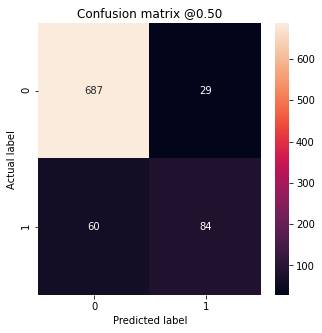

In [ ]:
metrics_simple_baseline=meterics(model_baseline)

Affichage des metrics dans le cas du modèle elaboré :

loss :  0.418681263923645
tp :  103.0
fp :  18.0
tn :  698.0
fn :  41.0
accuracy :  0.9313953518867493
precision :  0.8512396812438965
recall :  0.7152777910232544
auc :  0.932689368724823

Legitimate Transactions Detected (True Negatives):  698
Legitimate Transactions Incorrectly Detected (False Positives):  18
Fraudulent Transactions Missed (False Negatives):  41
Fraudulent Transactions Detected (True Positives):  103
Total Fraudulent Transactions:  144


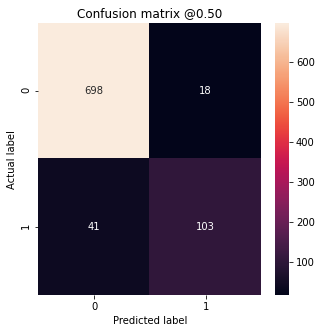

In [ ]:
metrics_simple_elab=meterics(model_elab)

D'après les résultats qu'on a obtenu à partir des deux modèles, on peut remarquer que dans le cas simple sans pondérations des classes ni modifications des données, le modèle baseline donne des résultats moyens alors alors que le modèle pondéré est est beaucoup plus performant que ça soit au niveau de l'efficacité ou bien la détection des anomalies.
 
D'après le test set qui est constitué de 144 cas d'attrition, le modèle baseline a réussi de détecter uniquement 84 cas, alors que le modèle élaboré a pu détecter 103 cas. Mais, en fonction de performance, même la détection de 103/144 n'est pas considérée très performante.

#3. Entrainement avec pondération des classes:

Calcule des poids pour chaque classe:

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

#Define a dictionary with the weight of each class:
class_weight = {0: weight_for_0, 1: weight_for_1}

Entrainement de modèle baseline en envoyant les poids calculés comme paramètres:

In [ ]:
#Train the baseline model with the initial weights and class weight:
model_baseline_weighted  = make_model_baseline()
model_baseline_weighted.load_weights('initial_weights')
baseline_history_weighted = model_baseline_weighted.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 1.1296 - tp: 103.0000 - fp: 18.0000 - tn: 3011.0000 - fn: 480.0000 - accuracy: 0.8621 - precision: 0.8512 - recall: 0.1767 - auc: 0.6385 - val_loss: 0.4644 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 576.0000 - val_fn: 112.0000 - val_accuracy: 0.8372 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4438
Epoch 2/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.1161 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 2313.0000 - fn: 439.0000 - accuracy: 0.8405 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4574 - val_loss: 0.4628 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 576.0000 - val_fn: 112.0000 - val_accuracy: 0.8372 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4474
Epoch 3/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.1120 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 2313.0000 - fn: 439.0000 - accuracy: 0.8405 - precision: 0.0000

Entrainement du modèle elaboré en passant les poids comme paramètre:

In [ ]:
#Train the elaborated model with the initial weights and class weight:
model_elab_weighted  = make_model_elab()
model_elab_weighted.load_weights('initial_weights_elab')
elab_history_weighted = model_elab_weighted.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.7006 - tp: 273.0000 - fp: 1046.0000 - tn: 1843.0000 - fn: 278.0000 - accuracy: 0.6151 - precision: 0.2070 - recall: 0.4955 - auc: 0.6252 - val_loss: 0.6899 - val_tp: 50.0000 - val_fp: 250.0000 - val_tn: 326.0000 - val_fn: 62.0000 - val_accuracy: 0.5465 - val_precision: 0.1667 - val_recall: 0.4464 - val_auc: 0.4915
Epoch 2/1000
1/1 [==============================] - 0s 89ms/step - loss: 0.6954 - tp: 192.0000 - fp: 1021.0000 - tn: 1292.0000 - fn: 247.0000 - accuracy: 0.5392 - precision: 0.1583 - recall: 0.4374 - auc: 0.4953 - val_loss: 0.6927 - val_tp: 55.0000 - val_fp: 265.0000 - val_tn: 311.0000 - val_fn: 57.0000 - val_accuracy: 0.5320 - val_precision: 0.1719 - val_recall: 0.4911 - val_auc: 0.5026
Epoch 3/1000
1/1 [==============================] - 0s 105ms/step - loss: 0.6917 - tp: 211.0000 - fp: 1094.0000 - tn: 1219.0000 - fn: 228.0000 - accuracy: 0.5196 - precision: 0.1617 - recall: 0.4806 - auc: 0.5105 - val_l

Affichage des metrics dans le cas du modèle baseline :

loss :  0.2790651321411133
tp :  125.0
fp :  77.0
tn :  639.0
fn :  19.0
accuracy :  0.8883720636367798
precision :  0.6188119053840637
recall :  0.8680555820465088
auc :  0.9330966472625732

Legitimate Transactions Detected (True Negatives):  639
Legitimate Transactions Incorrectly Detected (False Positives):  77
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  125
Total Fraudulent Transactions:  144


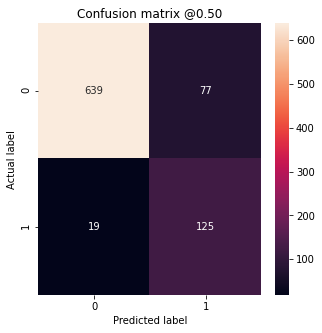

In [ ]:
metrics_weighted_baseline=meterics(model_baseline_weighted)

Affichage des metrics dans le cas du modèle elaboré :

loss :  0.2903153598308563
tp :  112.0
fp :  33.0
tn :  683.0
fn :  32.0
accuracy :  0.9244186282157898
precision :  0.7724137902259827
recall :  0.7777777910232544
auc :  0.9487701654434204

Legitimate Transactions Detected (True Negatives):  683
Legitimate Transactions Incorrectly Detected (False Positives):  33
Fraudulent Transactions Missed (False Negatives):  32
Fraudulent Transactions Detected (True Positives):  112
Total Fraudulent Transactions:  144


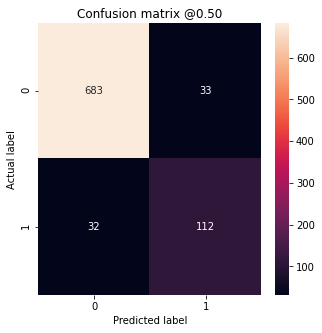

In [ ]:
metrics_weighted_elab=meterics(model_elab_weighted)

Dans notre data set de détection d'attrition, l'effet de la pondération des classes est beaucoup plus visible dans ce qu'on a pu voir avec les deux autres datasets, ou avec le modèle baseline on a passé de 84 détection à 125 détection, ce qui est considéré comme une très bonne résultat, et de même pour le modèle élaboré, on peut voir une progression de 102 à 112 détection sur 144.

Une autre remarque qu'on peut bien voir c'est que malgré la très bonne performance du modèle baseline dans le détection des anomalies, il est plus faible dans la précision, ou sur 713 cas de non attritions, le modèle baseline a détecté 77 fausses alertes. Le modèle élaboré lui est moins erroné et plus précis, il s'est trompé uniquement en 33 cas.
 



#4. Entrainement avec oversampling

Application de l'approche Random OverSampling avec le package imblearn:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.5)

train_features_over, train_labels_over = oversample.fit_resample(train_features, train_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des modèles baseline et elaboré avec les données modifier avec le random Oversampling:

In [ ]:
model_elab_over_random = train_model_elab(train_features_over,train_labels_over)

model_baseline_over_random = train_model_baseline(train_features_over,train_labels_over)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6882 - tp: 646.0000 - fp: 997.0000 - tn: 2032.0000 - fn: 654.0000 - accuracy: 0.6186 - precision: 0.3932 - recall: 0.4969 - auc: 0.6477 - val_loss: 0.6797 - val_tp: 38.0000 - val_fp: 183.0000 - val_tn: 393.0000 - val_fn: 74.0000 - val_accuracy: 0.6265 - val_precision: 0.1719 - val_recall: 0.3393 - val_auc: 0.4795
Epoch 2/1000
1/1 [==============================] - 0s 82ms/step - loss: 0.6881 - tp: 417.0000 - fp: 800.0000 - tn: 1513.0000 - fn: 739.0000 - accuracy: 0.5564 - precision: 0.3426 - recall: 0.3607 - auc: 0.4951 - val_loss: 0.6733 - val_tp: 30.0000 - val_fp: 147.0000 - val_tn: 429.0000 - val_fn: 82.0000 - val_accuracy: 0.6672 - val_precision: 0.1695 - val_recall: 0.2679 - val_auc: 0.4760
Epoch 3/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.6821 - tp: 365.0000 - fp: 664.0000 - tn: 1649.0000 - fn: 791.0000 - accuracy: 0.5806 - precision: 0.3547 - recall: 0.3157 - auc: 0.5078 - val_loss:

Affichage des metrics dans le cas du modèle Baseline :

loss :  0.22195488214492798
tp :  107.0
fp :  42.0
tn :  674.0
fn :  37.0
accuracy :  0.9081395268440247
precision :  0.718120813369751
recall :  0.7430555820465088
auc :  0.9426161050796509

Legitimate Transactions Detected (True Negatives):  674
Legitimate Transactions Incorrectly Detected (False Positives):  42
Fraudulent Transactions Missed (False Negatives):  37
Fraudulent Transactions Detected (True Positives):  107
Total Fraudulent Transactions:  144


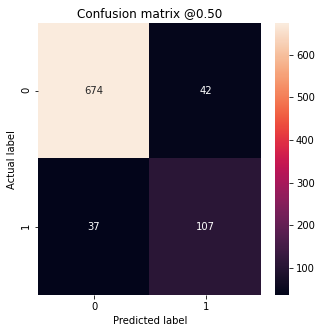

In [ ]:
metrics_over_random_baseline=meterics(model_baseline_over_random)

Affichage des metrics dans le cas du modèle elaboré :

loss :  0.2771812379360199
tp :  110.0
fp :  48.0
tn :  668.0
fn :  34.0
accuracy :  0.9046511650085449
precision :  0.6962025165557861
recall :  0.7638888955116272
auc :  0.9331790804862976

Legitimate Transactions Detected (True Negatives):  668
Legitimate Transactions Incorrectly Detected (False Positives):  48
Fraudulent Transactions Missed (False Negatives):  34
Fraudulent Transactions Detected (True Positives):  110
Total Fraudulent Transactions:  144


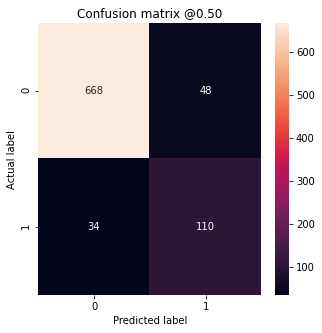

In [ ]:
metrics_over_random_elab=meterics(model_elab_over_random)

Application de l'approche Smote de oversampling:

In [ ]:
# APPLY THE SMOTE STRATEGY FOR OVERSAMPLING:

from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.5)

train_features_over, train_labels_over = oversample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des modèles oversampling et elaboré avec les données modifié par le Smote oversampling:

In [ ]:
model_elab_over_SMOTE = train_model_elab(train_features_over,train_labels_over)

model_baseline_over_SMOTE = train_model_baseline(train_features_over,train_labels_over)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6877 - tp: 619.0000 - fp: 1012.0000 - tn: 2017.0000 - fn: 681.0000 - accuracy: 0.6089 - precision: 0.3795 - recall: 0.4762 - auc: 0.6351 - val_loss: 0.6797 - val_tp: 38.0000 - val_fp: 180.0000 - val_tn: 396.0000 - val_fn: 74.0000 - val_accuracy: 0.6308 - val_precision: 0.1743 - val_recall: 0.3393 - val_auc: 0.4786
Epoch 2/1000
1/1 [==============================] - 0s 124ms/step - loss: 0.6877 - tp: 412.0000 - fp: 801.0000 - tn: 1512.0000 - fn: 744.0000 - accuracy: 0.5546 - precision: 0.3397 - recall: 0.3564 - auc: 0.4985 - val_loss: 0.6733 - val_tp: 30.0000 - val_fp: 145.0000 - val_tn: 431.0000 - val_fn: 82.0000 - val_accuracy: 0.6701 - val_precision: 0.1714 - val_recall: 0.2679 - val_auc: 0.4776
Epoch 3/1000
1/1 [==============================] - 0s 118ms/step - loss: 0.6827 - tp: 349.0000 - fp: 667.0000 - tn: 1646.0000 - fn: 807.0000 - accuracy: 0.5751 - precision: 0.3435 - recall: 0.3019 - auc: 0.5023 - val_lo

Affichage des metrics dans le cas du modèle baseline :

loss :  0.25376707315444946
tp :  114.0
fp :  42.0
tn :  674.0
fn :  30.0
accuracy :  0.9162790775299072
precision :  0.7307692170143127
recall :  0.7916666865348816
auc :  0.9371218681335449

Legitimate Transactions Detected (True Negatives):  674
Legitimate Transactions Incorrectly Detected (False Positives):  42
Fraudulent Transactions Missed (False Negatives):  30
Fraudulent Transactions Detected (True Positives):  114
Total Fraudulent Transactions:  144


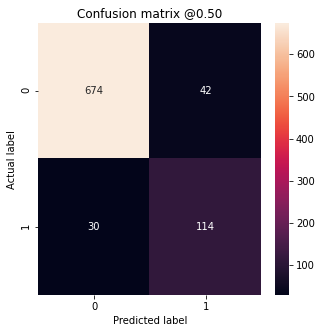

In [ ]:
metrics_over_SMOTE_baseline=meterics(model_baseline_over_SMOTE)

Affichage des metrics dans le cas du modèle elaboré :

loss :  0.24545568227767944
tp :  116.0
fp :  42.0
tn :  674.0
fn :  28.0
accuracy :  0.9186046719551086
precision :  0.7341772317886353
recall :  0.8055555820465088
auc :  0.9441727995872498

Legitimate Transactions Detected (True Negatives):  674
Legitimate Transactions Incorrectly Detected (False Positives):  42
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  116
Total Fraudulent Transactions:  144


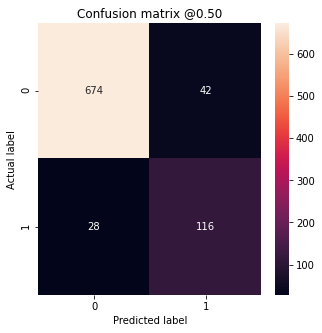

In [ ]:
metrics_over_SMOTE_elab=meterics(model_elab_over_SMOTE)

Application de l'approche ADASYN de l'oversampling:

In [ ]:
# APPLY THE ADASYN STRATEGY FOR OVERSAMPLING:

from imblearn.over_sampling import ADASYN

oversample = ADASYN(sampling_strategy=0.5)

train_features_over, train_labels_over = oversample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des deux modeles baseline et elaboré avec les nouveau données:

In [ ]:
model_elab_over_ADASYN = train_model_elab(train_features_over,train_labels_over)

model_baseline_over_ADASYN = train_model_baseline(train_features_over,train_labels_over)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6905 - tp: 635.0000 - fp: 984.0000 - tn: 2045.0000 - fn: 720.0000 - accuracy: 0.6113 - precision: 0.3922 - recall: 0.4686 - auc: 0.6359 - val_loss: 0.6798 - val_tp: 38.0000 - val_fp: 184.0000 - val_tn: 392.0000 - val_fn: 74.0000 - val_accuracy: 0.6250 - val_precision: 0.1712 - val_recall: 0.3393 - val_auc: 0.4785
Epoch 2/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.6869 - tp: 423.0000 - fp: 815.0000 - tn: 1498.0000 - fn: 788.0000 - accuracy: 0.5451 - precision: 0.3417 - recall: 0.3493 - auc: 0.5005 - val_loss: 0.6734 - val_tp: 31.0000 - val_fp: 150.0000 - val_tn: 426.0000 - val_fn: 81.0000 - val_accuracy: 0.6642 - val_precision: 0.1713 - val_recall: 0.2768 - val_auc: 0.4738
Epoch 3/1000
1/1 [==============================] - 0s 121ms/step - loss: 0.6854 - tp: 362.0000 - fp: 704.0000 - tn: 1609.0000 - fn: 849.0000 - accuracy: 0.5593 - precision: 0.3396 - recall: 0.2989 - auc: 0.4971 - val_los

Affichage des metrics dans le cas du modèle baseline :

loss :  0.27524879574775696
tp :  117.0
fp :  37.0
tn :  679.0
fn :  27.0
accuracy :  0.9255813956260681
precision :  0.7597402334213257
recall :  0.8125
auc :  0.9393670558929443

Legitimate Transactions Detected (True Negatives):  679
Legitimate Transactions Incorrectly Detected (False Positives):  37
Fraudulent Transactions Missed (False Negatives):  27
Fraudulent Transactions Detected (True Positives):  117
Total Fraudulent Transactions:  144


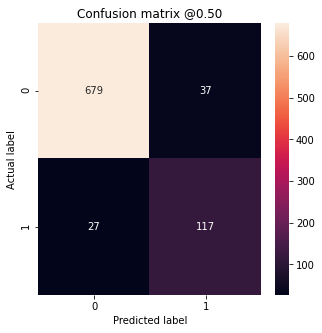

In [ ]:
metrics_over_ADASYN_baseline = meterics(model_baseline_over_ADASYN)

Affichage des metrics dans le cas du modèle elaboré :

loss :  0.27007758617401123
tp :  114.0
fp :  41.0
tn :  675.0
fn :  30.0
accuracy :  0.9174418449401855
precision :  0.7354838848114014
recall :  0.7916666865348816
auc :  0.9440517425537109

Legitimate Transactions Detected (True Negatives):  675
Legitimate Transactions Incorrectly Detected (False Positives):  41
Fraudulent Transactions Missed (False Negatives):  30
Fraudulent Transactions Detected (True Positives):  114
Total Fraudulent Transactions:  144


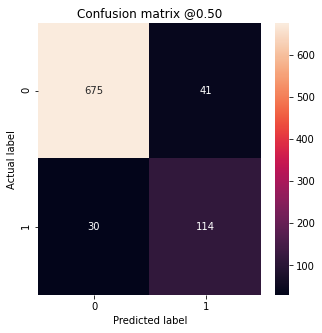

In [ ]:
metrics_over_ADASYN_elab = meterics(model_elab_over_ADASYN)

Après l'application des différentes approches de oversampling, et d'utiliser les données résultats pour entraîner les modèles, on peut voir que le meilleur résultat obtenu est avec l'approche ADASYN et la modèle baseline, les résultats sont très performants, ou on a eu une détection de 117 cas d'altérations sur 144, avec un taux d'erreur de 37/716.

Dans toutes les autres approches, le modèle élaboré est plus performant que le modèle baseline, avec des résultats qui sont très proches du meilleur résultat comme avec l'approche SMOTE, le modèle élaboré a réussi a détecté 116 cas avec une différence d'un seul cas que le meilleur résultat.
 



#5. Entrainement avec undersampling

Application de l'approche Random de l'UnderSampling avec le package imblearn:

In [ ]:
# Apply Random Undersampling strategy for undersampling:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)

train_features_under, train_labels_under = oversample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des modèles avec les données résultat:

In [ ]:
model_elab_under_random = train_model_elab(train_features_under,train_labels_under)

model_baseline_under_random = train_model_baseline(train_features_under,train_labels_under)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6905 - tp: 633.0000 - fp: 983.0000 - tn: 2046.0000 - fn: 722.0000 - accuracy: 0.6111 - precision: 0.3917 - recall: 0.4672 - auc: 0.6349 - val_loss: 0.6798 - val_tp: 38.0000 - val_fp: 184.0000 - val_tn: 392.0000 - val_fn: 74.0000 - val_accuracy: 0.6250 - val_precision: 0.1712 - val_recall: 0.3393 - val_auc: 0.4785
Epoch 2/1000
1/1 [==============================] - 0s 111ms/step - loss: 0.6869 - tp: 423.0000 - fp: 815.0000 - tn: 1498.0000 - fn: 788.0000 - accuracy: 0.5451 - precision: 0.3417 - recall: 0.3493 - auc: 0.5005 - val_loss: 0.6734 - val_tp: 31.0000 - val_fp: 150.0000 - val_tn: 426.0000 - val_fn: 81.0000 - val_accuracy: 0.6642 - val_precision: 0.1713 - val_recall: 0.2768 - val_auc: 0.4738
Epoch 3/1000
1/1 [==============================] - 0s 105ms/step - loss: 0.6854 - tp: 362.0000 - fp: 704.0000 - tn: 1609.0000 - fn: 849.0000 - accuracy: 0.5593 - precision: 0.3396 - recall: 0.2989 - auc: 0.4971 - val_los

Affichage des performance pour le modèle baseline:

loss :  0.27524879574775696
tp :  117.0
fp :  37.0
tn :  679.0
fn :  27.0
accuracy :  0.9255813956260681
precision :  0.7597402334213257
recall :  0.8125
auc :  0.9393670558929443

Legitimate Transactions Detected (True Negatives):  679
Legitimate Transactions Incorrectly Detected (False Positives):  37
Fraudulent Transactions Missed (False Negatives):  27
Fraudulent Transactions Detected (True Positives):  117
Total Fraudulent Transactions:  144


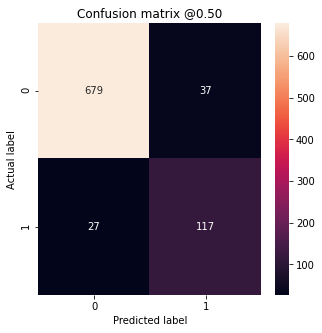

In [ ]:
metrics_under_random_baseline = meterics(model_baseline_under_random)

Affichage des performance pour le modèle elaboré:

loss :  0.27007758617401123
tp :  114.0
fp :  41.0
tn :  675.0
fn :  30.0
accuracy :  0.9174418449401855
precision :  0.7354838848114014
recall :  0.7916666865348816
auc :  0.9440517425537109

Legitimate Transactions Detected (True Negatives):  675
Legitimate Transactions Incorrectly Detected (False Positives):  41
Fraudulent Transactions Missed (False Negatives):  30
Fraudulent Transactions Detected (True Positives):  114
Total Fraudulent Transactions:  144


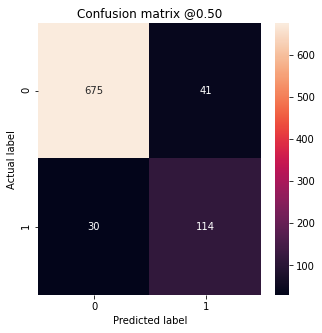

In [ ]:
metrics_under_random_elab =meterics(model_elab_under_random)

Application de l'approche TomekLinks de l'unversampling avec le package imblearn:

In [ ]:
# Apply Random Undersampling strategy for undersampling:
from imblearn.under_sampling import TomekLinks

undersample = TomekLinks(sampling_strategy='auto')

train_features_under, train_labels_under = undersample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des modèles avec les données résultants:

In [ ]:
model_elab_under_TomekLinks = train_model_elab(train_features_under,train_labels_under)

model_baseline_under_TomekLinks = train_model_baseline(train_features_under,train_labels_under)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6857 - tp: 285.0000 - fp: 1010.0000 - tn: 2019.0000 - fn: 298.0000 - accuracy: 0.6379 - precision: 0.2201 - recall: 0.4889 - auc: 0.6449 - val_loss: 0.6793 - val_tp: 38.0000 - val_fp: 181.0000 - val_tn: 395.0000 - val_fn: 74.0000 - val_accuracy: 0.6294 - val_precision: 0.1735 - val_recall: 0.3393 - val_auc: 0.4771
Epoch 2/1000
1/1 [==============================] - 0s 103ms/step - loss: 0.6729 - tp: 137.0000 - fp: 764.0000 - tn: 1549.0000 - fn: 302.0000 - accuracy: 0.6126 - precision: 0.1521 - recall: 0.3121 - auc: 0.4830 - val_loss: 0.6724 - val_tp: 28.0000 - val_fp: 146.0000 - val_tn: 430.0000 - val_fn: 84.0000 - val_accuracy: 0.6657 - val_precision: 0.1609 - val_recall: 0.2500 - val_auc: 0.4733
Epoch 3/1000
1/1 [==============================] - 0s 100ms/step - loss: 0.6662 - tp: 143.0000 - fp: 640.0000 - tn: 1673.0000 - fn: 296.0000 - accuracy: 0.6599 - precision: 0.1826 - recall: 0.3257 - auc: 0.4949 - val_lo

Affichage des performance pour le modèle baseline:

loss :  0.25653061270713806
tp :  84.0
fp :  29.0
tn :  687.0
fn :  60.0
accuracy :  0.8965116143226624
precision :  0.7433628439903259
recall :  0.5833333134651184
auc :  0.9249058961868286

Legitimate Transactions Detected (True Negatives):  687
Legitimate Transactions Incorrectly Detected (False Positives):  29
Fraudulent Transactions Missed (False Negatives):  60
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  144


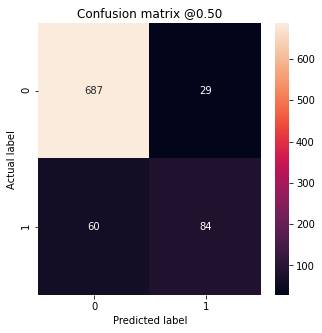

In [ ]:
metrics_under_TomekLinks_baseline = meterics(model_baseline_under_TomekLinks)

Affichage des performance pour le modèle elaboré:

loss :  0.418681263923645
tp :  103.0
fp :  18.0
tn :  698.0
fn :  41.0
accuracy :  0.9313953518867493
precision :  0.8512396812438965
recall :  0.7152777910232544
auc :  0.932689368724823

Legitimate Transactions Detected (True Negatives):  698
Legitimate Transactions Incorrectly Detected (False Positives):  18
Fraudulent Transactions Missed (False Negatives):  41
Fraudulent Transactions Detected (True Positives):  103
Total Fraudulent Transactions:  144


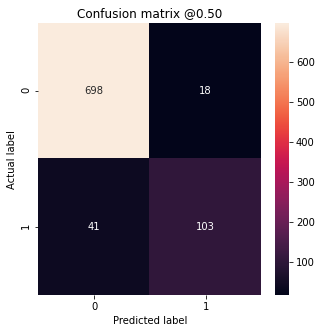

In [ ]:
metrics_under_TomekLinks_elab =meterics(model_elab_under_TomekLinks)

Après l'application des deux approches Random UnderSampling et Tomek Links d'un undersampling, on a obtenu un résultat qui semble très logique, ou avec le random undersampling, on a eu des très mauvaise résultats pour les deux modèles, ou le modèle baseline et élaboré ont detecté respectivement 84 et 103 cas d'attrition sur 144. Ceci est logique, car on a très peu de données, et en supprimant avec une façon random des données, on risque de perdre certains caractéristiques.
 
Par contre avec la méthode Tome Links, on a réussi d'obtenir de très bons résultats, ou les modèles baseline et élaboré ont étaient capables de détecter respectivement 115 et 117 cas d'attrition sur 144.
 



#6.Entrainement avec une approche hybrid de resampling

Applicaiton de l'approche hybrid, qui consiste de combiner l'oversampling et l'unversampling avec les approche RandomOverSampling et TomekLinks:

In [ ]:
over_sampler_step = RandomOverSampler(sampling_strategy=0.5)
over_features,over_labels = over_sampler_step.fit_resample(train_features,train_labels)
under_sampler_step = TomekLinks()
hybrid_features,hybrid_labels = under_sampler_step.fit_resample(over_features,over_labels)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des deux modèles baseline et elaboré:

In [ ]:
model_elab_hybrid_1 = train_model_elab(hybrid_features,hybrid_labels)

model_baseline_hybrid_1 = train_model_baseline(hybrid_features,hybrid_labels)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6863 - tp: 657.0000 - fp: 982.0000 - tn: 2047.0000 - fn: 643.0000 - accuracy: 0.6246 - precision: 0.4009 - recall: 0.5054 - auc: 0.6550 - val_loss: 0.6798 - val_tp: 38.0000 - val_fp: 181.0000 - val_tn: 395.0000 - val_fn: 74.0000 - val_accuracy: 0.6294 - val_precision: 0.1735 - val_recall: 0.3393 - val_auc: 0.4797
Epoch 2/1000
1/1 [==============================] - 0s 109ms/step - loss: 0.6858 - tp: 460.0000 - fp: 802.0000 - tn: 1511.0000 - fn: 696.0000 - accuracy: 0.5682 - precision: 0.3645 - recall: 0.3979 - auc: 0.5159 - val_loss: 0.6734 - val_tp: 31.0000 - val_fp: 147.0000 - val_tn: 429.0000 - val_fn: 81.0000 - val_accuracy: 0.6686 - val_precision: 0.1742 - val_recall: 0.2768 - val_auc: 0.4744
Epoch 3/1000
1/1 [==============================] - 0s 100ms/step - loss: 0.6796 - tp: 397.0000 - fp: 668.0000 - tn: 1645.0000 - fn: 759.0000 - accuracy: 0.5886 - precision: 0.3728 - recall: 0.3434 - auc: 0.5309 - val_los

Affichage des performance pour le modèle baseline:

loss :  0.2060249149799347
tp :  115.0
fp :  31.0
tn :  685.0
fn :  29.0
accuracy :  0.930232584476471
precision :  0.7876712083816528
recall :  0.7986111044883728
auc :  0.9580132365226746

Legitimate Transactions Detected (True Negatives):  685
Legitimate Transactions Incorrectly Detected (False Positives):  31
Fraudulent Transactions Missed (False Negatives):  29
Fraudulent Transactions Detected (True Positives):  115
Total Fraudulent Transactions:  144


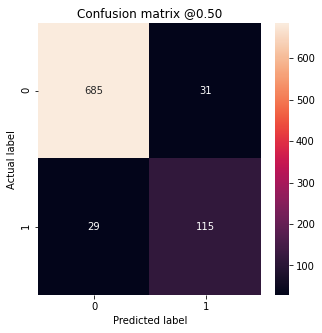

In [ ]:
metrics_hybrid1_baseline =meterics(model_baseline_hybrid_1)

Affichage des performance pour le modèle elaboré:

loss :  0.2703893482685089
tp :  117.0
fp :  39.0
tn :  677.0
fn :  27.0
accuracy :  0.9232558012008667
precision :  0.75
recall :  0.8125
auc :  0.9357494115829468

Legitimate Transactions Detected (True Negatives):  677
Legitimate Transactions Incorrectly Detected (False Positives):  39
Fraudulent Transactions Missed (False Negatives):  27
Fraudulent Transactions Detected (True Positives):  117
Total Fraudulent Transactions:  144


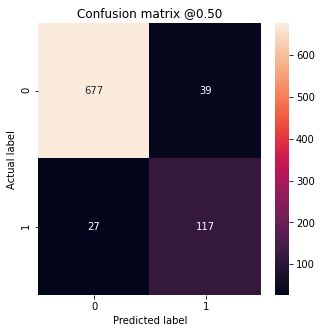

In [ ]:
metrics_hybrid1_elab = meterics(model_elab_hybrid_1)

Application d'une deuxième façon la méthode hybrid qui regroupe cette fois l'approche Smote d'oversampling et TomekLinks de UnderSampling:

In [ ]:
over_sampler_step = SMOTE(sampling_strategy=0.5)
over_features,over_labels = over_sampler_step.fit_resample(train_features,train_labels)
under_sampler_step = TomekLinks()
hybrid_features,hybrid_labels = under_sampler_step.fit_resample(over_features,over_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des deux modèles baseline et elaboré:

In [ ]:
model_elab_hybrid_2 = train_model_elab(hybrid_features,hybrid_labels)

model_baseline_hybrid_2 = train_model_baseline(hybrid_features,hybrid_labels)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6877 - tp: 626.0000 - fp: 1003.0000 - tn: 2026.0000 - fn: 674.0000 - accuracy: 0.6126 - precision: 0.3843 - recall: 0.4815 - auc: 0.6418 - val_loss: 0.6797 - val_tp: 38.0000 - val_fp: 180.0000 - val_tn: 396.0000 - val_fn: 74.0000 - val_accuracy: 0.6308 - val_precision: 0.1743 - val_recall: 0.3393 - val_auc: 0.4786
Epoch 2/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.6877 - tp: 412.0000 - fp: 801.0000 - tn: 1512.0000 - fn: 744.0000 - accuracy: 0.5546 - precision: 0.3397 - recall: 0.3564 - auc: 0.4985 - val_loss: 0.6733 - val_tp: 30.0000 - val_fp: 145.0000 - val_tn: 431.0000 - val_fn: 82.0000 - val_accuracy: 0.6701 - val_precision: 0.1714 - val_recall: 0.2679 - val_auc: 0.4776
Epoch 3/1000
1/1 [==============================] - 0s 103ms/step - loss: 0.6827 - tp: 349.0000 - fp: 667.0000 - tn: 1646.0000 - fn: 807.0000 - accuracy: 0.5751 - precision: 0.3435 - recall: 0.3019 - auc: 0.5023 - val_lo

Affichage des performance pour le modèle baseline:

loss :  0.25376707315444946
tp :  114.0
fp :  42.0
tn :  674.0
fn :  30.0
accuracy :  0.9162790775299072
precision :  0.7307692170143127
recall :  0.7916666865348816
auc :  0.9371218681335449

Legitimate Transactions Detected (True Negatives):  674
Legitimate Transactions Incorrectly Detected (False Positives):  42
Fraudulent Transactions Missed (False Negatives):  30
Fraudulent Transactions Detected (True Positives):  114
Total Fraudulent Transactions:  144


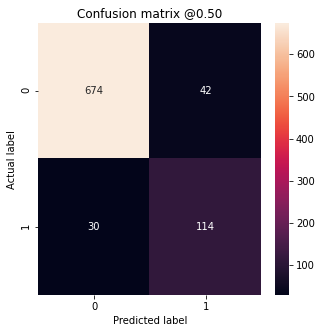

In [ ]:
metrics_hybrid2_baseline = meterics(model_baseline_hybrid_2)

Affichage des performance pour le modèle elaboré:

loss :  0.24545568227767944
tp :  116.0
fp :  42.0
tn :  674.0
fn :  28.0
accuracy :  0.9186046719551086
precision :  0.7341772317886353
recall :  0.8055555820465088
auc :  0.9441727995872498

Legitimate Transactions Detected (True Negatives):  674
Legitimate Transactions Incorrectly Detected (False Positives):  42
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  116
Total Fraudulent Transactions:  144


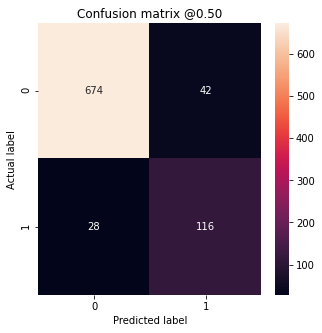

In [ ]:
metrics_hybrid2_elab= meterics(model_elab_hybrid_2)

Dans le but de regrouper les avantages des approches de oversampling et de undersampling, on a appliqué l'approche hybrid pour combiner les deux, et on a eu des résultats très satisfaisants, ou le regroupement de Random OverSampling et la méthode TomekLinks ont eu le meilleur score avec 117 détection sur 144 en utilisant le modèle élaboré. Par contre le modèle baseline a également réussi de détecter 115 attrition sur 144 avec moins plus de précision ( 31 pour le baseline contre 39 pour le modèle élaboré sur 712 cas ).
 
Le deuxième regroupement (SMOTE et Tomek Links) est aussi pas mal en terme de performance, mais il reste moins performant que le premier.
 

#7. Conclusions générales

Dans la conclusion générale, on recupère tout les métrics ( accurancy, AUC, Precision, Recall ) des approches précédents pour les deux modèles baseline et elaboré, et puis les affichera dans un plot pour pouvoir visualiser les résultas:

In [ ]:
# Créer un dictionnaire de l'ensemble des résultats
list_res = [metrics_simple_baseline,
metrics_weighted_baseline,
metrics_over_random_baseline,
metrics_over_SMOTE_baseline,
metrics_over_ADASYN_baseline,
metrics_under_random_baseline,
metrics_under_TomekLinks_baseline,
metrics_hybrid1_baseline,
metrics_hybrid2_baseline,
metrics_simple_elab,
metrics_weighted_elab,
metrics_over_random_elab,
metrics_over_SMOTE_elab,
metrics_over_ADASYN_elab,
metrics_under_random_elab,
metrics_under_TomekLinks_elab, 
metrics_hybrid1_elab,
metrics_hybrid2_elab]
dict_res = {}
for i, res in enumerate(list_res):
  dict_res[i] = res


Création de DataFrame avec tout les metrics:

In [ ]:
df_res = pd.DataFrame.from_dict(dict_res,orient='index')
df_res.insert(0,'modele',['baseline','baseline','baseline','baseline','baseline','baseline','baseline','baseline','baseline','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré'])
df_res.insert(1,'methode',['simple','ponderation_class','random_oversampling','smote','adasyn','random_undersampling','tomek_links','random_over_tomeklinks','smote_tomeklinks']*2)

La fonction d'affiche des résultats:

In [ ]:
def plot_results(metric):
  ax = sns.barplot(x="modele", y=str(metric), hue="methode", data=df_res)
  ax.set_xlabel('Modèle',fontsize = 15)
  ax.set_ylabel(metric.capitalize(), fontsize = 15)
  ax.tick_params(labelsize=15)

  # Put the legend out of the figure
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
  plt.title(metric.capitalize())
  plt.show()

Le resultat pour AUC:

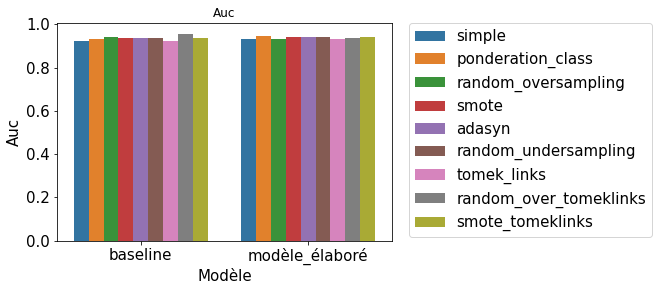

In [ ]:
# AUC
plot_results('auc')

le resultat pour Recall:

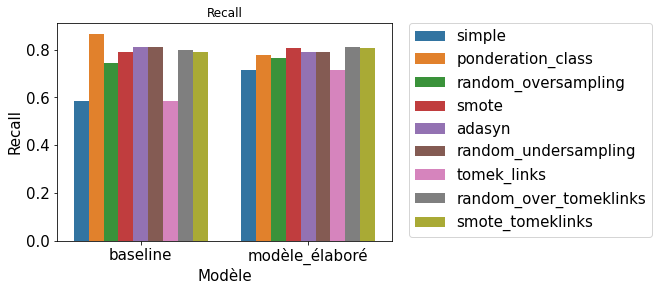

In [ ]:
# Recall
plot_results('recall')

le resultat pour la precision:

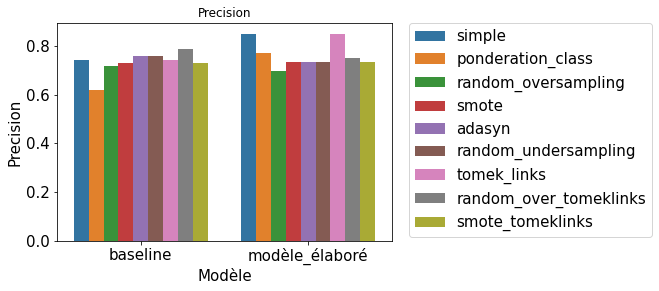

In [ ]:
# precision
plot_results('precision')

le resultat pour accuracy:

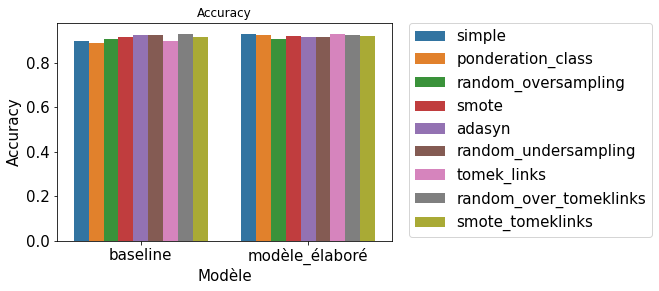

In [ ]:
# accuracy
plot_results('accuracy')

Après l'étude et la comparaison des modèles avec les différentes approches en appuyant sur plusieurs metrics, on est arrivé à la phase de comparaison de ces différentes approches.

Le data set originaire de notre problème qui consiste de détecter les altérations des employées n'étais pas assez riche en terme de quantité des données, on avait dans l'ensemble 4000 lignes utilisable, en plus de ça, les données n'ont pas été équilibré comme c'est expliqué précédemment, pour cela, on a essayé d'appliquer les meilleurs approches afin d'avoir les meilleurs résultats.

L'approche de undersampling consiste à supprimer des données pour avoir un équilibre des classes, ceci semble très déconseillé dans notre cas, car on est déjà dans le manque de quantité des données. Pour cela, on peut plutôt opter vers une solution de undersampling, qui consiste à générer des données en suivant plusieurs techniques afin d'avoir un équilibre dans les classes. Les résultats de l'approche oversampling étaient très satisfaisants, et en effet, on a réussi d'avoir le meilleur résultat avec la meilleure précision et recall.
On a vu également que la méthode de pondération des classes est aussi pas mal comme approche lorsqu' on a un déséquilibre des données, c'est très conseillé de l'utiliser également, par contre, ça va impacter la précision.

Finalement, le mélange des approches de oversampling et undersampling aussi semble très intéressant, ou d'un côté on donne plus d'importance à la classe minoritaire, et d'un autre, on donne un peu moins d'importance pour la classe majoritaire en supprimant quelques lignes. Le résultat de cette approche été très satisfaisant dans notre cas également, et en terme de détection, ça a réussi d'obtenir le meilleur résultat avec le mélange de RanddomoverSamplin et TomekLinks avec 117 détection sur 144.
 

